In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,precision_score,f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from scipy.stats import friedmanchisquare
from sklearn import preprocessing
import sklearn.neural_network as nn
from imblearn.metrics import geometric_mean_score
import lightgbm as lgb
from xgboost import XGBClassifier 
from statistics import mean

In [2]:
data= pd.read_csv('\\Users\\DELL\\Desktop\\sem_2\\Data_mining\\project\\feature_importance_datav1.csv')

In [37]:
data= pd.read_csv('\\Users\\DELL\\Desktop\\sem_2\\Data_mining\\project\\datav1.csv')

In [3]:
data.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'class'],
      dtype='object')

In [38]:
data.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'class', 'grad_school',
       'university', 'high_school', 'edu_others', 'married', 'single',
       'mrg_others', 'male', 'female'],
      dtype='object')

In [39]:
y=data["class"]

In [40]:
X=data.drop(["class"],axis=1)

In [41]:
normalized_X = preprocessing.normalize(X,axis=0)

In [42]:
normalized_X

array([[0.00054503, 0.00377938, 0.01374481, ..., 0.        , 0.        ,
        0.00743048],
       [0.00327017, 0.00409433, 0.        , ..., 0.        , 0.        ,
        0.00743048],
       [0.00245263, 0.00535412, 0.        , ..., 0.        , 0.        ,
        0.00743048],
       ...,
       [0.00081754, 0.00582655, 0.02748962, ..., 0.        , 0.00917161,
        0.        ],
       [0.00218011, 0.00645644, 0.00687241, ..., 0.        , 0.00917161,
        0.        ],
       [0.00136257, 0.00724381, 0.        , ..., 0.        , 0.00917161,
        0.        ]])

In [43]:
np.bincount(y)

array([23364,  6636], dtype=int64)

In [44]:
X=pd.DataFrame(normalized_X)

In [45]:
#oversampling 
smt = SMOTE()
X,y = smt.fit_sample(X, y)

In [46]:
np.bincount(y)

array([23364, 23364], dtype=int64)

In [47]:
X

array([[0.00054503, 0.00377938, 0.01374481, ..., 0.        , 0.        ,
        0.00743048],
       [0.00327017, 0.00409433, 0.        , ..., 0.        , 0.        ,
        0.00743048],
       [0.00245263, 0.00535412, 0.        , ..., 0.        , 0.        ,
        0.00743048],
       ...,
       [0.00272514, 0.00849214, 0.00851887, ..., 0.        , 0.        ,
        0.00743048],
       [0.00769634, 0.00582149, 0.        , ..., 0.        , 0.        ,
        0.00743048],
       [0.00143179, 0.00679139, 0.        , ..., 0.        , 0.        ,
        0.00743048]])

In [48]:
X=pd.DataFrame(X)

In [49]:
X

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000545,0.003779,0.013745,0.013377,0.000000,0.000000,0.000000,0.000000,0.000252,0.000207,...,0.000000,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
1,0.003270,0.004094,0.000000,0.013377,0.000000,0.000000,0.000000,0.015387,0.000173,0.000115,...,0.000623,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
2,0.002453,0.005354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001882,0.000936,...,0.001558,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
3,0.001363,0.005827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003025,0.003219,...,0.000312,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
4,0.001363,0.008976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000555,0.000378,...,0.000212,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.009172,0.00000
5,0.001363,0.005827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004145,0.003809,...,0.000249,0.009720,0.000000,0.000000,0.0,0.000000,0.007915,0.000000,0.009172,0.00000
6,0.013626,0.004567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023684,0.027497,...,0.004291,0.009720,0.000000,0.000000,0.0,0.000000,0.007915,0.000000,0.009172,0.00000
7,0.002725,0.003622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000764,0.000025,...,0.000481,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
8,0.003815,0.004409,0.000000,0.000000,0.013632,0.000000,0.000000,0.000000,0.000726,0.000941,...,0.000312,0.000000,0.000000,0.014261,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
9,0.000545,0.005512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014261,0.0,0.000000,0.007915,0.000000,0.009172,0.00000


In [15]:
X.columns=['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']

In [50]:
X.columns=['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'grad_school',
       'university', 'high_school', 'edu_others', 'married', 'single',
       'mrg_others', 'male', 'female']

In [51]:
X

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt6,grad_school,university,high_school,edu_others,married,single,mrg_others,male,female
0,0.000545,0.003779,0.013745,0.013377,0.000000,0.000000,0.000000,0.000000,0.000252,0.000207,...,0.000000,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
1,0.003270,0.004094,0.000000,0.013377,0.000000,0.000000,0.000000,0.015387,0.000173,0.000115,...,0.000623,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
2,0.002453,0.005354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001882,0.000936,...,0.001558,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
3,0.001363,0.005827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003025,0.003219,...,0.000312,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
4,0.001363,0.008976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000555,0.000378,...,0.000212,0.000000,0.008443,0.000000,0.0,0.008556,0.000000,0.000000,0.009172,0.00000
5,0.001363,0.005827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004145,0.003809,...,0.000249,0.009720,0.000000,0.000000,0.0,0.000000,0.007915,0.000000,0.009172,0.00000
6,0.013626,0.004567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023684,0.027497,...,0.004291,0.009720,0.000000,0.000000,0.0,0.000000,0.007915,0.000000,0.009172,0.00000
7,0.002725,0.003622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000764,0.000025,...,0.000481,0.000000,0.008443,0.000000,0.0,0.000000,0.007915,0.000000,0.000000,0.00743
8,0.003815,0.004409,0.000000,0.000000,0.013632,0.000000,0.000000,0.000000,0.000726,0.000941,...,0.000312,0.000000,0.000000,0.014261,0.0,0.008556,0.000000,0.000000,0.000000,0.00743
9,0.000545,0.005512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014261,0.0,0.000000,0.007915,0.000000,0.009172,0.00000


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y,test_size=0.3)

In [52]:
def Decision_Tree(X,y):
    dt=tree.DecisionTreeClassifier()
    accuracy=cross_val_score(dt,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(dt,X,y,cv=10,scoring='recall')
    precision=cross_val_score(dt,X,y,cv=10,scoring='precision')
    f1=cross_val_score(dt,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [53]:
def Dummy_Classifier(X,y):
    DC=DummyClassifier()
    accuracy=cross_val_score(DC,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(DC,X,y,cv=10,scoring='recall')
    precision=cross_val_score(DC,X,y,cv=10,scoring='precision')
    f1=cross_val_score(DC,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [54]:
def logistic_regression(X,y):
    SV = LogisticRegression(solver='liblinear')
    accuracy=cross_val_score(SV,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(SV,X,y,cv=10,scoring='recall')
    precision=cross_val_score(SV,X,y,cv=10,scoring='precision')
    f1=cross_val_score(SV,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [55]:
def KNeighbors_Classifier(X,y):
    KN=KNeighborsClassifier()
    accuracy=cross_val_score(KN,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(KN,X,y,cv=10,scoring='recall')
    precision=cross_val_score(KN,X,y,cv=10,scoring='precision')
    f1=cross_val_score(KN,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [56]:
def random_forest(X,y):
    RC=RandomForestClassifier(n_estimators=10)
    accuracy=cross_val_score(RC,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(RC,X,y,cv=10,scoring='recall')
    precision=cross_val_score(RC,X,y,cv=10,scoring='precision')
    f1=cross_val_score(RC,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [57]:
def Neural_Network(X,y):
    ann_clf_i = nn.MLPClassifier(activation='identity',learning_rate='constant',max_iter=3000)
    accuracy=cross_val_score(ann_clf_i,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(ann_clf_i,X,y,cv=10,scoring='recall')
    precision=cross_val_score(ann_clf_i,X,y,cv=10,scoring='precision')
    f1=cross_val_score(ann_clf_i,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [58]:
def Gaussian_NB(X,y):
    GNB=GaussianNB()
    accuracy=cross_val_score(GNB,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(GNB,X,y,cv=10,scoring='recall')
    precision=cross_val_score(GNB,X,y,cv=10,scoring='precision')
    f1=cross_val_score(GNB,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [59]:
def XGBoost(X,y):
    XGB=XGBClassifier()
    accuracy=cross_val_score(XGB,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(XGB,X,y,cv=10,scoring='recall')
    precision=cross_val_score(XGB,X,y,cv=10,scoring='precision')
    f1=cross_val_score(XGB,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [60]:
def lightgbm(X,y):
    LGB=lgb.LGBMClassifier()
    accuracy=cross_val_score(LGB,X,y,cv=10,scoring='accuracy')
    recall=cross_val_score(LGB,X,y,cv=10,scoring='recall')
    precision=cross_val_score(LGB,X,y,cv=10,scoring='precision')
    f1=cross_val_score(LGB,X,y,cv=10,scoring='f1')
    results(accuracy,recall,precision,f1)

In [61]:
def results(accuracy,recall,precision,f1):
    print("Accuracy values:",accuracy)
    print("Accuracy:",mean(accuracy))
    print("Recall",mean(recall))
    print("precision",mean(precision))
    print("f1:",mean(f1))

In [62]:
Decision_Tree(X,y)

Accuracy values: [0.66516902 0.67265725 0.67800599 0.79011553 0.78274829 0.81399829
 0.79644692 0.80736301 0.81035959 0.80757705]
Accuracy: 0.7624440947005
Recall 0.7784405205713918
precision 0.7547442448074827
f1: 0.7610070142203553


In [63]:
Dummy_Classifier(X,y)

Accuracy values: [0.49550706 0.5017116  0.50492084 0.49679076 0.51048801 0.50171233
 0.49464897 0.5109161  0.50149829 0.50898973]
Accuracy: 0.5027183677117953
Recall 0.5016697769942732
precision 0.4989570181586665
f1: 0.4923578893496108


In [64]:
logistic_regression(X,y)

Accuracy values: [0.67137356 0.71437741 0.68870347 0.69940094 0.68899829 0.68407534
 0.70012842 0.70547945 0.70933219 0.70141267]
Accuracy: 0.6963281739995663
Recall 0.5214429795253251
precision 0.8022267333431978
f1: 0.6318454503431039


In [65]:
KNeighbors_Classifier(X,y)

Accuracy values: [0.75780916 0.75909285 0.7614463  0.79032948 0.79452055 0.78681507
 0.79623288 0.80629281 0.80308219 0.8052226 ]
Accuracy: 0.7860843887931489
Recall 0.9020342604967145
precision 0.7320975830162356
f1: 0.8080760488141394


In [66]:
random_forest(X,y)

Accuracy values: [0.73705605 0.7601626  0.75438596 0.85023534 0.84995719 0.85166952
 0.86087329 0.86836473 0.86279966 0.87157534]
Accuracy: 0.8267079691795476
Recall 0.7893936363210063
precision 0.8547541346498644
f1: 0.8147397605811438


In [67]:
Neural_Network(X,y)

Accuracy values: [0.68656397 0.71501926 0.68271288 0.70004279 0.70847603 0.70162671
 0.71425514 0.71553938 0.72559932 0.7078339 ]
Accuracy: 0.7057669375472594
Recall 0.5714784057537764
precision 0.7786297368613323
f1: 0.6547995390538185


In [68]:
Gaussian_NB(X,y)

Accuracy values: [0.65489944 0.68549422 0.65639709 0.68378263 0.69092466 0.68107877
 0.69884418 0.70890411 0.71104452 0.69285103]
Accuracy: 0.6864220644955188
Recall 0.7020182509188105
precision 0.6819322984972228
f1: 0.6912699364406745


In [69]:
XGBoost(X,y)

Accuracy values: [0.63564399 0.65875053 0.69041506 0.95014976 0.95034247 0.93985445
 0.95590753 0.9604024  0.95355308 0.95547945]
Accuracy: 0.865049873315514
Recall 0.8056443470436867
precision 0.9045152334973231
f1: 0.8271284942408703


In [70]:
lightgbm(X,y)

Accuracy values: [0.64676936 0.66987591 0.70261018 0.93260591 0.94071062 0.92786815
 0.93964041 0.95376712 0.94863014 0.94349315]
Accuracy: 0.8605970949759967
Recall 0.7987072906958341
precision 0.9037846331404938
f1: 0.8261166073966305


In [ ]:
after_selection

In [27]:
Decision_Tree(X,y)

Accuracy values: [0.67351305 0.70303808 0.70282413 0.79075738 0.80094178 0.7895976
 0.8041524  0.80329623 0.81335616 0.80843322]
Accuracy: 0.7689910045955182
Recall 0.7894786116435425
precision 0.7565232492367508
f1: 0.770757337683712


In [28]:
Dummy_Classifier(X,y)

Accuracy values: [0.49529311 0.51604621 0.50727428 0.49422336 0.50406678 0.50278253
 0.49871575 0.49978596 0.49871575 0.49507705]
Accuracy: 0.5011980806091406
Recall 0.4959342083282044
precision 0.5007018106674098
f1: 0.501137472482167


In [29]:
logistic_regression(X,y)

Accuracy values: [0.67008986 0.71544715 0.68720582 0.68827557 0.68942637 0.68771404
 0.703125   0.6947774  0.70526541 0.69349315]
Accuracy: 0.6934819769520695
Recall 0.5112138300771977
precision 0.8047283676225995
f1: 0.6250219689429937


In [30]:
KNeighbors_Classifier(X,y)

Accuracy values: [0.7597347  0.77920411 0.76037655 0.79311083 0.80586473 0.79002568
 0.80672089 0.80714897 0.81035959 0.80372432]
Accuracy: 0.7916270365501961
Recall 0.9167148236235426
precision 0.7331372878551555
f1: 0.8145880843909398


In [31]:
random_forest(X,y)

Accuracy values: [0.75181857 0.77000428 0.77128798 0.85087719 0.86151541 0.85402397
 0.86986301 0.86472603 0.87457192 0.86344178]
Accuracy: 0.8332130142115228
Recall 0.7920884476058171
precision 0.8498626067364368
f1: 0.8218831138714412


In [32]:
Neural_Network(X,y)

Accuracy values: [0.68378263 0.71544715 0.68100128 0.69234061 0.69734589 0.70505137
 0.7140411  0.70547945 0.71939212 0.70077055]
Accuracy: 0.7014652152537206
Recall 0.5619327956752891
precision 0.7808429648615968
f1: 0.6512489440077504


In [33]:
Gaussian_NB(X,y)

Accuracy values: [0.67650834 0.71437741 0.68335473 0.68977321 0.6994863  0.68878425
 0.7078339  0.7067637  0.72217466 0.69777397]
Accuracy: 0.6986830473590424
Recall 0.5960883508889162
precision 0.750302849628414
f1: 0.6641988013731595


In [34]:
XGBoost(X,y)

Accuracy values: [0.64334617 0.66324347 0.6957638  0.93966624 0.94520548 0.9338613
 0.94691781 0.95291096 0.95761986 0.94071062]
Accuracy: 0.8619245710751988
Recall 0.8067125925404892
precision 0.897370630277785
f1: 0.8274424129627965


In [35]:
lightgbm(X,y)

Accuracy values: [0.65532734 0.68271288 0.70967052 0.92383398 0.92401541 0.91630993
 0.93814212 0.94071062 0.94049658 0.92765411]
Accuracy: 0.8558873482570443
Recall 0.8025560738213726
precision 0.8906666183957559
f1: 0.8270407598984755


3.798827909941433


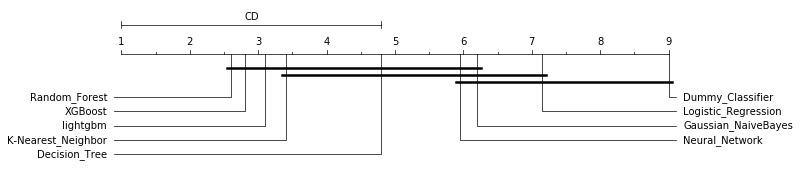

In [90]:
import Orange as orn
import matplotlib.pyplot as plt
names = ["Decision_Tree","Logistic_Regression","Dummy_Classifier","K-Nearest_Neighbor","Random_Forest","XGBoost","lightgbm","Gaussian_NaiveBayes","Neural_Network"]
avranks =  [4.8,7.15,9,3.4,2.6,2.8,3.1,6.2,5.95]
cd = orn.evaluation.compute_CD(avranks, 10) #tested on 30 datasets
print(cd)
orn.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=1.2)
plt.show()



In [88]:
KNN=[1,1,2,4,4,4,4,4,5,5] 
DT=[5,6,4,5,5,5,5,5,4,4] 
NN=[3,3.5,8,6,7,6,6,7,7,6] 
DC=[9,9,9,9,9,9,9,9,9,9] 
RF=[2,2,1,3,3,3,3,3,3,3] 
LR=[6,3.5,6,8,8,8,8,8,8,8] 
NB=[4,5,7,7,6,7,7,6,6,7] 
XB=[8,8,5,1,1,1,1,1,1,1] 
LG=[7,7,3,2,2,2,2,2,2,2]
print("KNN:",mean(KNN))
print("DT:",mean(DT))
print("NN:",mean(NN))
print("DC:",mean(DC))
print("RF:",mean(RF))
print("LR:",mean(LR))
print("NB:",mean(NB))
print("XB:",mean(XB))
print("LG:",mean(LG))

KNN: 3.4
DT: 4.8
NN: 5.95
DC: 9
RF: 2.6
LR: 7.15
NB: 6.2
XB: 2.8
LG: 3.1
